In [1]:
import datajoint as dj

In [2]:
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

Connecting daveliu@mesoscale-activity.datajoint.io:3306


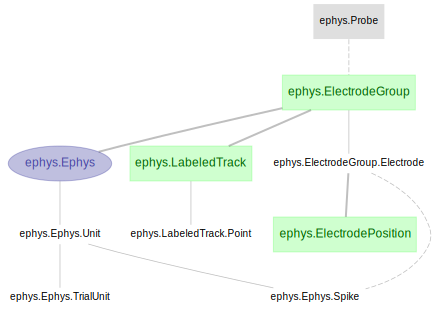

In [3]:
dj.ERD(ephys)

In [4]:
mouse=ephys.experiment.lab.Animal()
#mouse.insert1((399752, '2017-8-1'))
#mouse.insert1((123456, '2017-8-1'))
#mouse.insert1((400483, '2017-8-1'))
#mouse.insert1((400482, '2017-8-1'))
mouse

animal Janelia ANM ID (6 digits),dob
123456,2017-08-01
397853,2017-08-01
399752,2017-08-01


In [5]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

username,fullname
daveliu,Dave Liu


In [6]:
rig=ephys.experiment.lab.Rig()
#rig.insert1(('TRig3', 'Training rig 3'))
#rig.insert1(('TRig2', 'Training rig 2'))
#rig.insert1(('TRig1', 'Training rig 1'))
#rig.insert1(('RRig', 'Recording rig'))
rig

rig,rig_description
EPhys1,Ephys rig 1
RRig,Recording rig
TRig1,Training rig 1
TRig2,Training rig 2
TRig3,Training rig 3


In [7]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((123456, 'tw5'))
#animalWaterRestriction.insert1((399752, 'dl7'))
#animalWaterRestriction.insert1((400483, 'dl8'))
#animalWaterRestriction.insert1((400482, 'dl9'))
animalWaterRestriction

animal Janelia ANM ID (6 digits),water_restriction water restriction number
123456,tw5
397853,dl14
399752,dl7


In [8]:
trialNote = ephys.experiment.TrialNote()

In [9]:
import numpy as np

In [10]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [11]:
outcome = (behaviorTrial & 'animal = 123456').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 123456').fetch('early_lick', order_by='session')

In [12]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))
data2 = np.zeros(len(outcome))

In [13]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1
data2[outcome=='ignore'] = 1

In [14]:
trial_note = (trialNote & 'animal = 123456').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [15]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

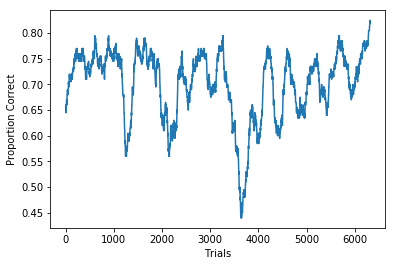

In [16]:
yMA = movingaverage(data,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

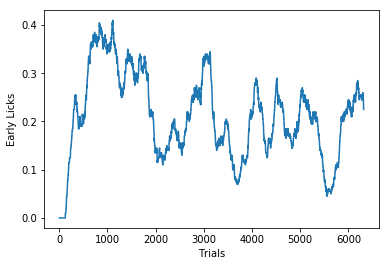

In [17]:
yMA = movingaverage(data1,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')

Text(0,0.5,'Ignores')

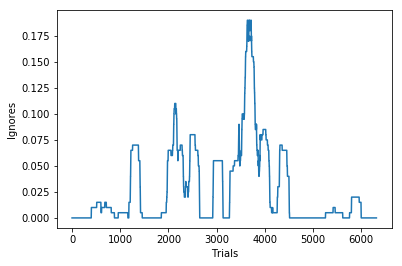

In [18]:
yMA = movingaverage(data2,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Ignores')